# IBM Quantum Campus Education Series
## Part 1: A Delve into the Quantum Realm

Creator:
- Rishwi Thimmaraju

Editors:
- Brian Ingmanson
- James Weaver
- Katie McCormik

## Notebook 4
- Bell States
- Representation of Quantum Information Using Density Matrices
- Measurements
- Tasks


<div>

<img src="https://media.datacenterdynamics.com/media/images/Cleveland_Clinic_IBM_quantum_II.original.jpg" style="height:340px" />

</div>

# BEGIN NOTEBOOK 4

- **Before getting started, Do all the Necessary installations and package imports similar to last three notebooks**

<h2>Quantum Entanglement and Bell States</h2>

Quantum Entanglement is one of the bizzare phenomenon, of sub atomic particles, about which we don't yet know the why? and how? part.

Physics Perspective: We just know that if two quantum particles are entagled, then they are linked to each other even if separated by a very large distance in space.

Math Perspective: If two particles are entagled, you cannot write their state as a tensor product of two vectors(such as Bell state)

When two particles are entangled, you cannot describe about one without considering the other. Entanglement is broken when the entangled particles decohere through interaction with the environment; for example, when a measurement is made. If you measure one of the entangled particle, the state of the other is known instantaneously which seems like faster than light. But according to Einstein nothing can travel faster than time.

In 1935 Albert Einstein, Boris Podolsky, and Nathan Rosen wrote about this phenomenon which is then called the famous EPR Paradox. Later erwin Schrodinger worked on it but Einstein was not much of a supporter of this non local phenomenon.

|-------------------------------EPR---------------------------------|---------------------------Erwin Schrodinger----------------------------|-------------------John Stewart Bell------------------|
|:-:|:-:|:-:|
|![First Image](https://pbs.twimg.com/media/FvWctUmXoAAhQ2H.jpg:large)|![Second Image](https://hips.hearstapps.com/hmg-prod/images/gettyimages-515582950.jpg)|![Third Image](https://render.fineartamerica.com/images/rendered/default/poster/5.5/8/break/images-medium-5/2-john-stewart-bell-peter-menzel.jpg)|



Let's talk about Bell's Theorem and inequality in the next notebook, but if you want to know more. see the below link.

[Watch Olivia Lanes talk more about Bell's Inequality and the 2022 Nobel prize Experiment](https://youtu.be/9OM0jSTeeBg?si=OkQvqcxvk5PBNd91)

<h2>Task - Create a GHZ state</h2>

1. Create a 3-Qubit, 3-bit circuit
2. Apply Hadamard gate to the first qubit(Qubit index starts from 0. so first qubit means q0)
3. Apply CNOT gate with first qubit as control and second as target
4. Apply CNOT gate with first qubit as control and third as target
5. Plot Bloch multivector
6. Measure the qubits
7. Draw the circuit
8. Run using AerSimulator
9. Plot Histogram

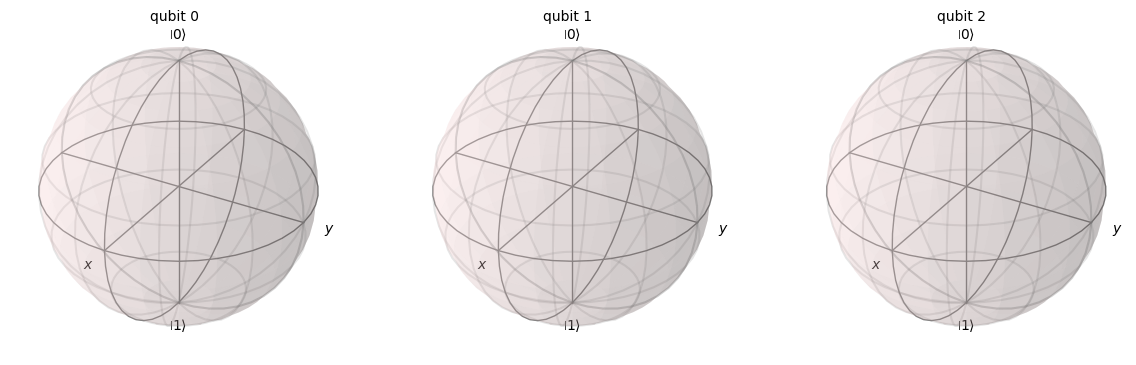

In [ ]:
# WRITE YOUR CODE BELOW

                          #STEP 1

                          #STEP 2

                          #STEP 3

                          #STEP 4


                          #STEP 5



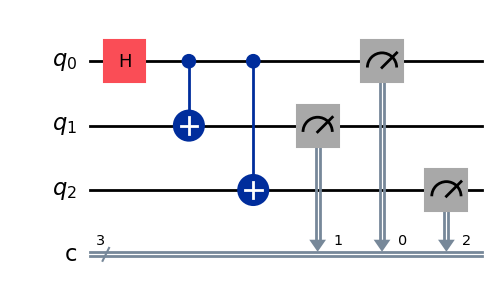

In [ ]:
                          #STEP 6



                          #STEP 7

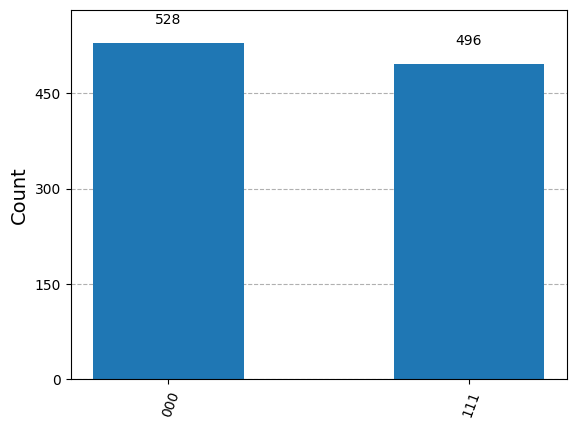

In [ ]:
                          #STEP 8

                          #STEP 9

The above state that you got is called a GHZ state which is another special state that will be discussed later. But from the Bell state $\frac{|00\rangle + | 11\rangle}{\sqrt2}$ you already know that if the first qubit is 0 after measurement, second qubit will also be 0. If the first qubit is 1 after measurement, then second qubit will also be 1.

Let's run this bell circuit on a simulator(an ideal quantum computer without errors) and also on a Real device and let's see the difference in the plots.

Hurrah!!!!!!!!🕺💃 it's time to run your first circuit on a Real Quantum Device.🤩🤩🤩

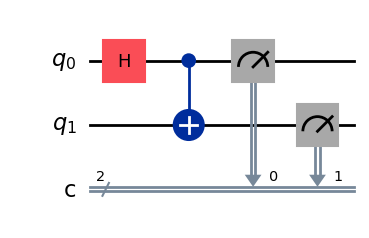

In [ ]:
# CIRCUIT CREATION

qc = QuantumCircuit(2,2)

# APPLY HADAMARD GATE
qc.h(0)
# APPLY CNOT GATE
qc.cx(0,1)

# MEASURE THE QUBITS
qc.measure(0,0)
qc.measure(1,1)

# DRAW THE CIRCUIT
qc.draw(output='mpl')

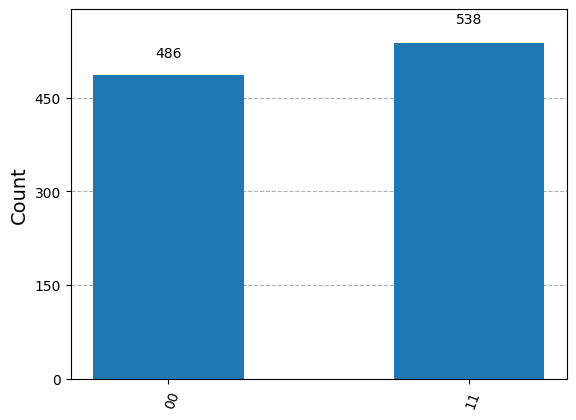

In [ ]:
# RUNNING ON A SIMULATOR

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

<h2>Running on a real Quantum Device</h2>

You should save your IBM Quantum Account through which you can access all the IBM Quantum systems.

Steps to Follow:

1. Go to [IBM Quantum Portal](https://quantum.ibm.com/)
2. Log In if you are not logged in already
3. Click on the Account icon beside the search icon on the top right
4. Click manage account from the drop down
5. Scroll down to the instances section
6. In the plan column if you see an instance with premium plan choose that. Else choose Ibm q/ open/ main plan
7. Click the three dots that is on the right end
8. Click copy 'qiskit-ibm-runtime' code
9. Paste it in the Below Code Cell
10. Go back to the Account page of IBM Quantum Portal
11. Copy the API token in API token section where you can see the copy icon
12. Replace the <API token> in the below code with your API key.
13. Run the below code and continue

In [ ]:
# FILL YOUR CODE BELOW





QiskitRuntimeService from the qiskit_ibm_runtime package will run the quantum circuits on a real quantum system. The API Token is unique for every account.

Uncommenting the save_account code and filling your instance and token details will save your account details on your device if you are running this notebook on your computer instead of a cloud service like Google Colab.

For now, Run the Below code cell directly. The explanation is in the comments, but in the next notebook, you will execute each part of it individually.

<IBMBackend('ibm_kyoto')>
>>> Job ID: ct5qa812tw9g008mb6gg
>>> Job Status: QUEUED
Counts for the meas output register: {'00': 2193, '11': 1302, '01': 270, '10': 331}


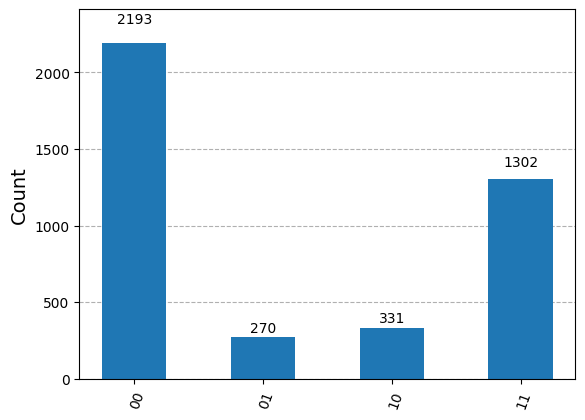

In [ ]:
# IMPORTING REQUIRED PACKAGES
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService

#service = QiskitRuntimeService()



# SELECTING THE LEAST BUSY QUANTUM DEVICE TO RUN THE CIRCUIT
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print(backend)




# CREATING THE BELL CIRCUIT
n_qubits = 2

circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure_all()



# OPTIMIZING THE CIRCUIT TO THE DEVICE SELECTED
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)



# GETTING SAMPLER TO RUN THE CIRCUIT AND GET COUNTS
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)



#RUNNING THE JOB ON THE DEVICE USING SAMPLER
job = sampler.run([isa_circuit])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")



# GETTING RESULTS FROM THE JOB AND PLOTTING THE HISTOGRAM
result = job.result()

# Get results for the first (and only) PUB
pub_result = result[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

plot_histogram(pub_result.data.meas.get_counts())

As you can see there are some extra bars in the plot(compared to the ideal simulator plot) which means the qubits didn't perform as expected. Any ideas about what is at play here???

It is nature again, becuase of the Errors caused by the surroundings. To rotate the qubits microwave pulses are applied which are a kind of radiation in the broad spectrum of electromaganetic radiation. Why doesn't some external sources such as heat from the wires, sound from the device, cosmic background radiation cause the qubit to rotate. These alterations, called errors, induced by the external radiation will change the state of the qubit, which should not happen in an ideal case like you saw with the simulator.

So these environment induced qubit changes are called errors. Even though the qubits are isolated inside a dilution refrigirator at 15mK, today's Quantum Computers are not perfect and errors are the main reason behind it. People are working to come up with ways to mitigate and correct these errors to make better quantum chips, as we speak. Error mitigation and correction mitigation is a topic for another notebook.

But now you know that the state vector representation is not enough to represent these kind of scenarios. What else do you have?

<h2>Density Matrices</h2>

Density matrices are generalized version of state vectors. When you have **pure states**, it is easy to represent in state vector format but if you have an initial quantum wave which you have no certain information about(**Mixed state**), Density matrices will come in handy.

The bell state, $\frac{|0\rangle+|1\rangle}{\sqrt2}$ is a pure state because you know for fact that the combined state of two qubits is in $|00\rangle$ with 50% probability and in $|11\rangle$ with 50% probability. But if asked to write qubit 1 and qubit 2 state separately, you can't do it because you don't know which state either qubits are in. You only know the combined state for sure. You will know the state of qubit 1 and 2 when you measure them.

Before measuring, the individual qubits, they are in either 0 or 1. If you read it properly - They are not in 0 AND 1 at the same time, but they are in 0 OR 1

The "or" situation cannot be represented using state vectors. You need Density matrices. Notations like ket, bra, outer product are important to learn before getting into Density matrix representation.

You know that $|0\rangle$ is called ket 0. There is a dual notation for this which called a bra which is denoted as $\langle0|$ (and is called bra 0)

$
|0\rangle=
\begin{bmatrix}
1 \\
0
\end{bmatrix} \ \ \ \ \ <=> \ \ \ \
\langle 0|=
{\begin{bmatrix}
1 & 0 \\
\end{bmatrix}}^*
$

$\langle a| = ((|a\rangle)^T)^*$  where * means a complex conjugate which means after transposing you should flip the sign in front of all the imaginary numbers

OUTER PRODUCT is given by multiplying the ket with bra,

$|0\rangle \langle 0|
=\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0\\
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\
0 & 0
\end{bmatrix}
$

So in the bell state scenario, before we measure, the first qubit is in $|0\rangle$ with 50% probability or in $|1\rangle$ with 50% probability
We can represent that as follows

$\rho = \frac{1}{2}|0\rangle \langle 0| + \frac{1}{2}|1\rangle \langle 1|
=\frac{1}{2}
(\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0\\
\end{bmatrix}+
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
0 & 1\\
\end{bmatrix})=
\frac{1}{2}
(
    \begin{bmatrix}
    1 & 0\\
    0 & 0
    \end{bmatrix}+
    \begin{bmatrix}
    0 & 0\\
    0 & 1
    \end{bmatrix}
)=
\begin{bmatrix}
\frac{1}{2} & 0\\
0 & \frac{1}{2}
\end{bmatrix}
$  

As shown above, a Density Matrix is represented using $\rho$ and it is made up of an ensemble(set) of pure states with some associated probabilities  

${\rho}_{\ pure} \ =\ |\Psi\rangle \langle \Psi| \ \ \ \ \ \ $   ${\rho}_{\ mixed} \ =\ \sum_{k=1}^{n}{a_k |\Psi_k\rangle \langle \Psi_k|}$

You can represent both pure states and mixed states using density matrices

For Example:

${\rho}_{\ pure} \ =\ |+\rangle \langle +|$ is a Pure State because the + state has the quantum wave nature of being in the $|0\rangle$ and $|1\rangle$ state at the same time. ($|0\rangle \langle 0| \ \ and \ \  |1\rangle \langle 1|$ are also pure states)

but

${\rho}_{\ mixed} \ = \frac{1}{2}|0\rangle \langle 0| + \frac{1}{2}|1\rangle \langle 1|$ is a Mixed state because it has a classical randomness of being either in $|0\rangle$ or $|1\rangle$ but you don't know in which it is...

${\rho}_{\ mixed} \ = 0.3*|0\rangle \langle 0| + 0.7*|1\rangle \langle 1|$ is also a Mixed state. Mixed states represent uncertainty in a quantum system, similar to what happens when noise is introduced causing errors. There is no guarentee that the initial state you have create is exactly in the state that you wanted to create.

Mixed ensembles/states arise in quantum mechanics in two different situations:

1. when the preparation of the systems lead to numerous pure states in the ensemble, and thus one must deal with the statistics of possible preparations

2. when one wants to describe a system of entangled particles, without describing their combined state; this case is typical for a system interacting with some environment (e.g. decoherence). In this case, the density matrix of an entangled system differs from that of an ensemble of pure states that, combined, would give the same statistical results upon measurement.

A pure quantum state is a state that can not be written as a probabilistic mixture, or convex combination, of other quantum states. So if you take $|+ \rangle \langle + |$ state and expand it

$|+ \rangle \langle + | = (\frac{|0\rangle + |1\rangle}{\sqrt2}) (\frac{\langle 0| + \langle 1 |}{\sqrt2}) = \frac{1}{2} (|0\rangle \langle 0| + |0\rangle \langle 1| + |1\rangle \langle 0| + |1\rangle \langle 1|)$

It is apparent that $(\frac{1}{2} (|0\rangle \langle 0| +  |1\rangle \langle 1|)$ is different from the above state becuase there is no single pure state that this can be written where as the $|+\rangle$ state is a pure state in itself.

For example, if Alice prepare the qubit in |+> state then she is preparing it in pure state. If she prepares in either $|0\rangle$ or $|1\rangle$ but forgets which one she prepared in. Then when she measures the qubit, she will get $|0\rangle$ in some outcomes and $|1\rangle$ in some. Now she doesn't have clarity about what she has created. If we assume she had created $|0\rangle$ but due to some error it has flipped and gave 1 when measured. This doesn't mean Alice created a |+> state. She know for sure that she wanted to create either $|0\rangle$ or $|1\rangle$. This is a mixed state scenario that can be denoted using density matrices.

Sometimes even if you want to create $|0\rangle \langle 0|$ state 10 times, but due to some bit flip error at creation, state $|1\rangle \langle 1|$ might be created(imagine error occured 5 times, finally resulting 0 - half of the times and 1 - half of the times). To reduce these errors(mixed states) there should be a mathematical representation. Density Matrix representation is the one used for it. Off diagonal elements of a density matrix are called coherence terms.

If you have a Density Matrix to say if it is a pure state you can find $\rho^2$ and for a state to be a pure state $\rho^2 = \rho$

You can use this Density matrix representation for a lot of other things such as measurements, errors, and more, which are explained further. Before moving forward to Measurements, please do read the properties that all Density matrices should possess.

1. Trace should be 1 (Trace is sum of the principal diagonal elements of a matrix)
2. It should be hermitian $(\rho = \rho^\dagger)$
3. Positive Semi-Definite (We will discuss this later)


<h3>DensityMatrix() function in qiskit.quantum_info can be used to print out the density matrix representation of the Quantum Circuit</h3>

In [ ]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a Bell state for demonstration
qc = QuantumCircuit(2)
qc.h(0)
qc.crx(pi/2, 0, 1)
psi = Statevector(qc)
psi.draw("latex")  # psi is a Statevector object

<IPython.core.display.Latex object>

In [ ]:
from qiskit.quantum_info import DensityMatrix
DensityMatrix(qc).draw("latex")  # convert to a DensityMatrix and draw

<IPython.core.display.Latex object>

<h2>Measurements</h2>
Measurement is basically observing a quantum particle. If you imagine an electron being like a wave around the nucleus, it will collapse to one particular location on the orbit around the nucleus, when you look into the atom. This gives you the position but it's distribution and probablistic nature is no more present. Measurement makes a qubit collapse to a bit.

This section explains what qc.measure(0,0) actually mean.

The default measurement that occurs when you use .measure() method is a Z-basis measurement also called as Computational basis measurement. It's time to recollect the information about basis states from the precious notebooks

Computational Basis: {$|0\rangle, |1\rangle$}   Diagonal basis: {$|+\rangle, |-\rangle$}  and there are many other basis sets whose linear combination can form any state in that vector space(Hilbert Space).

As Computational basis($|0\rangle, \ |1\rangle$) is the most common basis used, Z-basis measurement is considered as default. To simply put using the bloch sphere representation, Z-basis measurement is trying to find the distance(angle) of the vector from the $|0\rangle$ and $|1\rangle$ end of the Z-axis. As you can see in the below bloch sphere, north pole of Z axis is $|0\rangle$ and south pole is $|1\rangle$, where these $|0\rangle$ and $|1\rangle$ are called the eigenstates of Pauli Z. The genetleman in the following picture invented the Bloch sphere representation, which is named after him - **"*Felix Bloch* "**.

|Bloch Sphere representation|Bloch Sphere representation|Bloch Sphere representation|-----------------Felix Bloch------------------|
|:-:|:-:|:-:|:-:|
|![First Image](https://i.sstatic.net/3do7L.png)|![Second Image](https://www.researchgate.net/publication/335028508/figure/fig1/AS:789466423762944@1565234871365/The-Bloch-sphere-provides-a-useful-means-of-visualizing-the-state-of-a-single-qubit-and.ppm)|![Third Image](https://www.sharetechnote.com/html/QC/image/BlochSphere_Y_02.png)|![Fourth Image](https://upload.wikimedia.org/wikipedia/commons/0/0b/Felix_Bloch%2C_Stanford_University.jpg)|

Measuring the state once will just give you0 or 1. Measuring repeatedly in Z bais is to see how much of the wave function(the probability distribution) is towards $|0\rangle$ and $|1\rangle$, based on no. of 0's and 1's you get in those n measurements.

As per steps of circuit based quantum computing, you have intialized a single qubit and applied some unitary gates(rotations) to it. Now you don't know which state your qubit is in. You just know that it is in some superposition of $|0\rangle$ and $|1\rangle$. If an electron is the qubit here, and it is in state $\alpha |0\rangle +\beta |1\rangle$. The electron knows what $\alpha$ and $\beta$ are. The electron has wave characteristics before it is measured.

If this experiment of Initializing the same state, applying same quantum circuit, and shooting microwave pulse to collapse it to either 0 or 1 is performed "n" number of times, you will see the collapse probabilities of the state to 0 being $\alpha^2$ and to 1 being $\beta^2$. This property is called the "*BORN RULE*"

To find out the probability with which the state will collapse to state $|0\rangle$ for a state $|\Psi = \alpha |0\rangle + \beta |1\rangle$, the $|0\rangle \langle 0|$ outer product should be sandwiched in between the $\langle \Psi |$ and $|\Psi \rangle$ . In measurements these outer products are called Measurement Operators or Projectors.

$\langle \Psi |0\rangle \langle 0|\Psi \rangle \ =\  \ (\alpha \langle 0| + \beta \langle 1|)\ \ |0\rangle \langle 0|\ \ (\alpha |0\rangle + \beta |1\rangle) = \alpha^2 \ \langle 0|0\rangle \langle 0|0\rangle \ \ = \ \ \alpha^2 {\langle 0|0\rangle}^2 \ \ =\ \ \alpha^2 \ (1)^2 = \alpha^2$

it is similar with projector of eigenstate $|1\rangle$

$\langle \Psi |1\rangle \langle 1|\Psi \rangle \ =\  \ (\alpha \langle 0| + \beta \langle 1|)\ \ |1\rangle \langle 1|\ \ (\alpha |0\rangle + \beta |1\rangle) = \beta^2 \ \langle 1|1\rangle \langle 1|1\rangle \ \ = \ \ \beta^2 {\langle 1|1\rangle}^2 \ \ =\ \ \beta^2 \ (1)^2 = \beta^2$

$\langle 0|0 \rangle$ is called an inner product - It's time for you to figure out the concepts yourself. Try to use the internet to know about the inner product. B

what is Z measurement???

Pauli Z matrix can be written as
$Z=
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}=
|0\rangle \langle 0| - |1\rangle \langle 1|
$

Where $|0\rangle$ and $|1\rangle$ the eigenstates of Z and the coefficients in front of $|0\rangle \langle 0|$ and $ |1\rangle \langle 1|$ are their respective eigenvalues. So, the Eigen value of $|0\rangle $ is 1 and eigenvalue of $|1\rangle$ is -1

Eigenvalues are the only output that a current quantum computer can produce in the end. When a measurement is applied on a qubit which is some unknown state, the nature itself picks one of the two projectors($|0\rangle \langle 0|$ and $ |1\rangle \langle 1|$) in random. If it picks $|0\rangle \langle 0|$ which gives you 1 as output, or if it picks $|1\rangle \langle 1|$ then the output will be -1. You can only measure a quantum state once, because, after that it collapses to a classical state.

So now re initialize the same state again, apply same gates again and let the nature pick any one projector, resulting in some eigenvalue. Repeat this process for a large number of times and then count the number of occurences of eigenvalues 1 and -1 which gives you the probability of $|0\rangle$ and $|1\rangle$

Example:
$|\Psi\rangle \ = \ \alpha |0\rangle + \beta |1\rangle$ (some state)

Measurement 1: picked $|0\rangle \langle 0|$ - got 1

Measurement 2: picked $|1\rangle \langle 1|$ - got -1

Measurement 3: picked $|1\rangle \langle 1|$ - got -1

.

.

.

Measurement 1: picked $|0\rangle \langle 0|$ - got 1

Total no. of Measurements : 1000

Total 1's : 333

Total -1's : 667

Probability of $|0\rangle$ before measurement is $= \frac{333}{1000} = 0.333 = \frac{1}{3}$

Probability of $|1\rangle$ before measurement is $= \frac{667}{1000} = 0.667 = \frac{2}{3}$

Conclusion : The State vector is Close to $\frac{1}{\sqrt3}|0\rangle + \frac{\sqrt2}{\sqrt3}|1\rangle$ and the vector arrow is closer to $|1\rangle$ than to $|0\rangle$



Below code cell performs this experiment

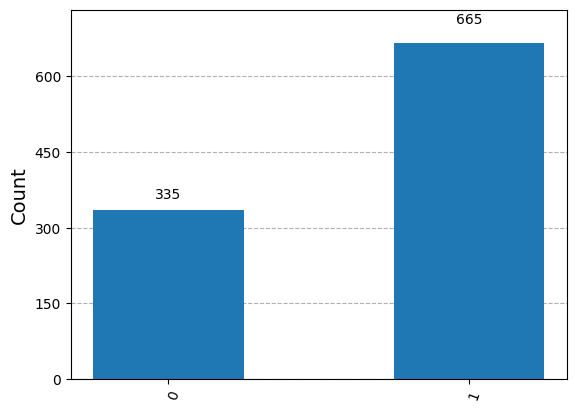

In [ ]:
# This code demonstrates the above example

s = Statevector([1/sqrt(3), sqrt(2/3)])
counts = s.sample_counts(1000)
plot_histogram(counts)

As you can see, the code has run 1000 shots of the experiment and got counts of 0's and 1's which are basically 1(or 0) and -1(or 1) eigenvalues respectively.

<h5>Measurement in Different Basis</h5>

I think we have discussed about basis vectors and what they are. The two most important bases sets that you need to know are

1. Computational Basis:- {$|0\rangle, |1\rangle$}

2. Diagonal Basis:- {$|+\rangle, |-\rangle$}

So if the state $|\psi \rangle = |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt2}$ is measured in computational basis of {$|0\rangle, |1\rangle$} theresult would be $|0\rangle \ \ and \ \  |1\rangle$ with 50% probability each.

Because $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt2}$

But if the Basis of measurement is {$|+\rangle, |-\rangle$} on state $|\psi\rangle = |+\rangle$ then the result would be ......


Below experiments will show the answer.

<h2>MEASUREMENT IN COMPUTATIONAL (Z) - BASIS</h2>

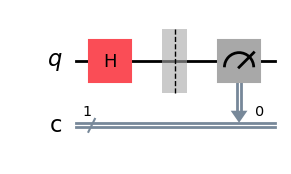

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()                      # BARRIER IS LIKE A SEPARATION BETWEEN DIFFERENT STAGES OF THE CIRCUIT


# MEASURING IN Z - BASIS
qc.measure(0,0)


qc.draw(output='mpl')

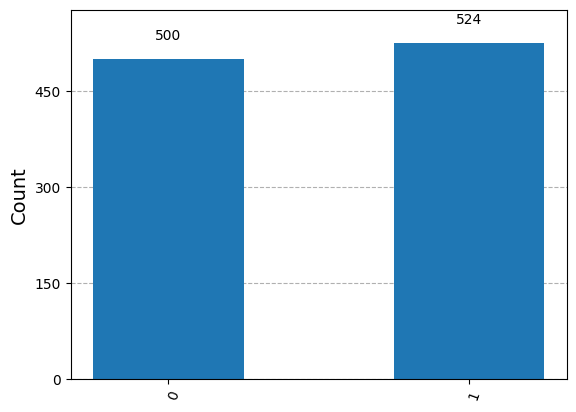

In [ ]:
from qiskit_aer import AerSimulator

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

But if you measure the same $|+\rangle$ state in Diagonal basis, then you are looking at the state as combinations of {$|+\rangle \ and |-\rangle$} but not {$|0\rangle, |1\rangle$}

When measured on $|\psi \rangle = |+\rangle \ \ \ => \ \ \ \langle \psi | + \rangle \langle + |\psi \rangle \ \ = \ \ \langle + | + \rangle \langle + |+ \rangle \ \ = \ \ 1$

As There is only $|+\rangle$ in the state $|\Psi\rangle$, Measurment will get $|+\rangle$ with 100% probability

It's just like going to a different coordinate axes, where all the vectors are scalar multiples of $|+\rangle$ and $|-\rangle$ and trying to measure them in that basis.

<h2>MEASUREMENT IN Diagonal(X) - BASIS</h2>

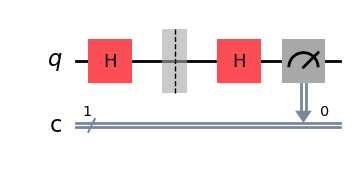

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()



# MEASURING IN Diagonal(X) - BASIS
qc.h(0)
qc.measure(0,0)


qc.draw(output='mpl')

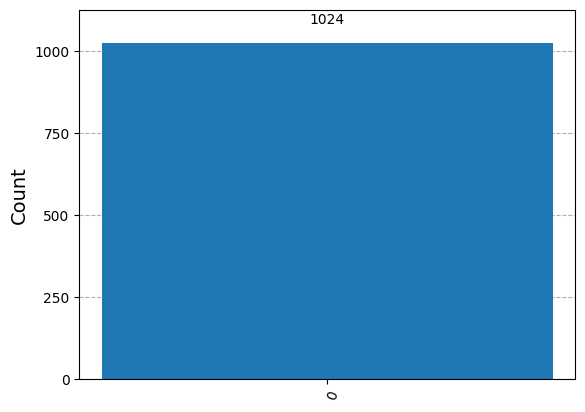

In [ ]:
from qiskit_aer import AerSimulator

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

0 outcome means eigenvalue 1. Hence Proved

<h2>Task</h2>

Similar to Z and X basis, there is Y basis too.
1. Study about it.
2. Write code to form the circuit with a Hadamard gate
3. Measure the circuit in Y-basis and
4. Plot the counts.
5. Try to understand it mathematically using matrices.

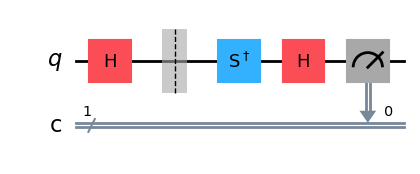

In [ ]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()

# MEASURING IN Y - BASIS
# WRITE YOUR CODE HERE




qc.measure(0,0)
qc.draw(output='mpl')

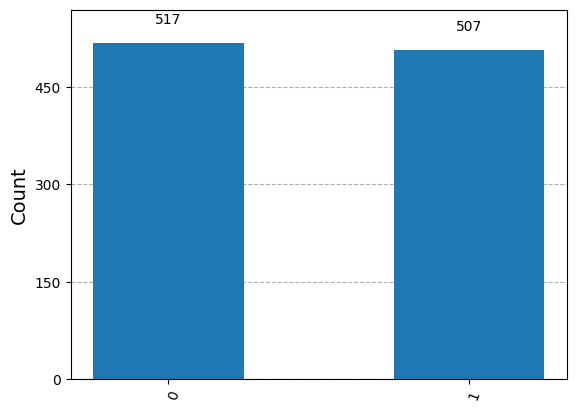

In [ ]:
from qiskit_aer import AerSimulator

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

<h2>Task</h2>

There are three more Bell states

1. Look up on the internet
2. create the remaining three bell states using Qiskit Circuits and
3. use a Real backend to run it.
4. Plot the outcomes

In [ ]:
# Bell Circuit 2



In [ ]:
# Bell Circuit 3



In [ ]:
# Bell Circuit 4



Hurrahhhh!!!!🎉🎉🎉 Congratulations, you have successfully completed the fourth notebook in the series. Kudos!!!👏👏👏, you just have 1 more left.

The next notebook teaches you and sets you up with the current useful Quantum Computing tools, See you there!!!

### Further Resources

If you are interested in knowing more about what quantum computing is and what are some of it's applications and possible future impact, Click the below link and follow the course.

[Quantum Business Foundations - IBM Learning Platform](https://learning.quantum.ibm.com/course/quantum-business-foundations) - **Get your badge**

An in detail video series on basics of Quantum Information by Dr. John Watrous - [Basics of Quantum Information](https://learning.quantum.ibm.com/course/basics-of-quantum-information)

Generalized formulations of Quantum Information by Dr. John Watrous - [General Formulation of Quantum Information](https://learning.quantum.ibm.com/course/general-formulation-of-quantum-information)



# END NOTEBOOK 4